In [1]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn.datasets
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
def write_answer(num, filename):
    with open(filename, "w") as fout:
        fout.write(str(num))

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадет в диапазон, заданный для правильных ответов - в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Если вам захочется ускорить вычисление cross_val_score - можете попробовать использовать параметр n_jobs, но будьте осторожны: в одной из старых версий sklearn была ошибка, которая приводила к неверному результату работы cross_val_score при задании n_jobs отличным от 1. Сейчас такой проблемы возникнуть не должно, но проверить, что все в порядке, не будет лишним.

In [3]:
digits = sklearn.datasets.load_digits()

In [4]:
Y = digits.target
X = digits.data

In [5]:
from sklearn.cross_validation import cross_val_score 

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from sklearn.tree import DecisionTreeClassifier 
clf =  DecisionTreeClassifier()

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы  с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [7]:
np.mean(cross_val_score(clf, X, Y, scoring = 'accuracy', cv = 10))

0.83250114282310328

In [8]:
write_answer(0.82801953160653807, "answer1.txt")

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [9]:
from sklearn.ensemble import BaggingClassifier 
clf =  BaggingClassifier(n_estimators=100)

In [10]:
np.mean(cross_val_score(clf, X, Y, scoring = 'accuracy', cv = 10))

0.92438133353232765

In [12]:
write_answer(0.92435039464106161, "answer2.txt")

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $$\sqrt(d)$$ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [78]:
cnt_features = int(X.shape[1] ** 0.5)
clf =  BaggingClassifier(max_features=cnt_features, n_estimators=100)

In [79]:
cross_val_score(clf, X, Y, scoring="accuracy", cv = 10).mean()

0.93377202010020643

In [80]:
write_answer(0.93377202010020643, "answer3.txt")

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $$\sqrt(d)$$ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [56]:
cnt_features = int(X.shape[1] ** 0.5)

In [76]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features=cnt_features), n_estimators=100)

In [77]:
cross_val_score(clf, X, Y, scoring="accuracy", cv = 10).mean()

0.95456420993061586

In [81]:
write_answer(0.95456420993061586, "answer4.txt")

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [89]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

In [90]:
cross_val_score(clf, X, Y, scoring="accuracy", cv = 10).mean()

0.95391672828290464

In [93]:
param_grid ={
    'n_estimators': np.linspace(5, 150, 30, dtype=int),
    'max_features': np.linspace(5, 60, 12, dtype=int),
    'max_depth' : np.linspace(1, 150, 150, dtype=int),
}
clf_random_forest = RandomForestClassifier(n_estimators=100, max_features=cnt_features)
clf_random_forest.fit(X, Y)
print(cross_val_score(clf_random_forest, X, Y, cv=10, n_jobs=1).mean())

0.952763409643


In [98]:
#Анализ алгоритма при изменении количества деревьев
cross_val_cnt_trees = []
for n_estimator in param_grid['n_estimators']:
    clf = RandomForestClassifier(n_estimators=n_estimator, max_features=cnt_features)
    clf.fit(X, Y)
    cross_val_cnt_trees.append( cross_val_score(clf, X, Y, cv=10).mean() )

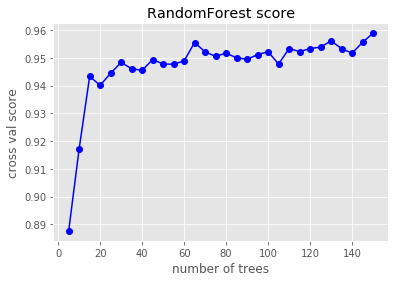

In [99]:
plt.plot(param_grid['n_estimators'], cross_val_cnt_trees, 'b-o')
plt.xlabel('number of trees')
plt.ylabel('cross val score')
plt.title('RandomForest score')

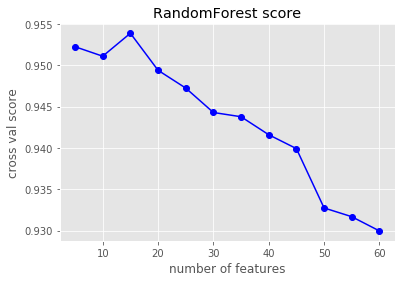

In [101]:
#Анализ алгоритма при изменении количества признаков
cross_val_cnt_features = []
for cnt_feature in param_grid['max_features']:
    clf = RandomForestClassifier(n_estimators=100, max_features=cnt_feature)
    clf.fit(X, Y)
    cross_val_cnt_features.append( cross_val_score(clf, X, Y, cv=10).mean() )

plt.plot(param_grid['max_features'], cross_val_cnt_features, 'b-o')
plt.xlabel('number of features')
plt.ylabel('cross val score')
plt.title('RandomForest score')

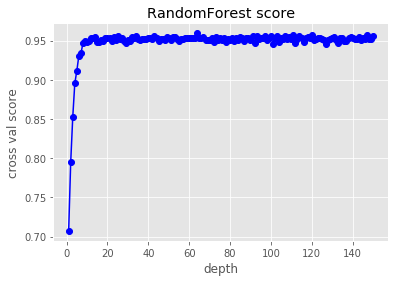

In [102]:
#Анализ алгоритма при изменении глубины дерева
cross_val_depth = []
for depth in param_grid['max_depth']:
    clf = RandomForestClassifier(n_estimators=100, max_features=cnt_features, max_depth=depth)
    clf.fit(X, Y)
    cross_val_depth.append( cross_val_score(clf, X, Y, cv=10).mean() )
plt.plot(param_grid['max_depth'], cross_val_depth, 'b-o')
plt.xlabel('depth')
plt.ylabel('cross val score')
plt.title('RandomForest score')